# # IBM Coursera Advanced Data Science Capstone

 
Building a Value Prediction system


According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. The bank is no exception.

Digitization of everyday life means that customers expect services to be delivered in a personalized and timely manner, and often before they even realize they need them. In its 3rd Kaggle competition, the Santander Group aims to go beyond recognizing the need to provide a financial service to a client and intends to determine the amount or the value of the client's transaction. It means anticipating customer needs in a more concrete, but also simple and personal way. With so many financial services choices, this need is more important than ever. [Banco Santander]

In this book, we are building a prediction system to help identify the value of transactions for each potential customer. It is a first step that Santander must nail down to personalize its services on a large scale.

# Goal 
In this notebook, I expect to:
    <ul>
        <li>Apply regressions algorithms</li>
        <li>Understand the idea of parallel programming</li>
        <li> Build a simple model for a real usecase: Value prediction system</li>
        <li> Understand how to validate the results</li>
    <ul>    

In [2]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 135kB/s eta 0:00:015   |█▌                              | 10.1MB 7.7MB/s eta 0:00:2714.5MB 7.7MB/s eta 0:00:27     |██▌                             | 16.7MB 7.7MB/s eta 0:00:26     |██████████                      | 68.1MB 28.7MB/s eta 0:00:06     |███████████▉                    | 80.8MB 28.7MB/s eta 0:00:0530.9MB/s eta 0:00:04    |████████████████▉               | 114.5MB 8.7MB/s eta 0:00:12     |█████████████████▏              | 117.0MB 8.7MB/s eta 0:00:12    | 119.3MB 8.7MB/s eta 0:00:12     |██████████████████              | 122.8MB 8.7MB/s eta 0:00:11��██▊           | 141.0MB 14.4MB/s eta 0:00:06     |█████████████████████▊          | 147.7MB 8.8MB/s eta 0:00:08     |██████████████████████████      | 176.9MB 9.1MB/s eta 0:00:05     |██████████████████████████▏     | 177.8MB 9.1MB/s eta 0:00:05     |█████████████████████████████▍  | 200.2MB 9.1MB/s eta 0:00:021
     |████████████████████████████████| 204kB 31.2MB/s eta 0:00:01
  Stor

# Importing Library

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import RidgeCV, LassoCV, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE,  SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import Normalizer

from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, StringType
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import statsmodels.api as sm
from sklearn.svm import SVR
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.regression import LinearRegression
sqlContext = SQLContext(sc)


import warnings
warnings.filterwarnings("ignore")

import keras
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [4]:
import seaborn as sns

# 1. Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data.


In [5]:
# The code was removed by Watson Studio for sharing.

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
data.shape

(4459, 4993)

In [4]:
data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [10]:
df = data.drop(["ID"], axis=1)
df.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


### 1.1 Data vizualisation

Let take a look at the target distribution now. 

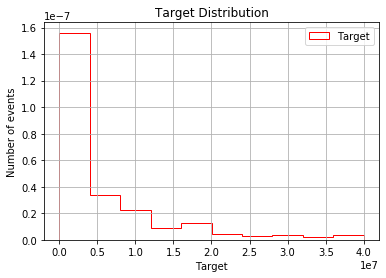

In [42]:
#target distribution
plt.title("Target Distribution")
plt.hist(df["target"], label='Target', histtype='step', color='r', alpha=1.0, density=1)
plt.xlabel("Target")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("images/target_distribution.png")
plt.show()

From the plot above, we noticed that target is a right tail on the right hand side, so we talk about positive skew. We will need to transform it using log transform or other method of transformation. 

### 1.2 Feature Engineering

#### 1.2.1. Pearson method

In this method, we filter and take only the subset of relevant features. The filtering is done using Pearson correlation

In [11]:
cor=df.corr()

In [ ]:
# Evaluating correlation  using Pearson Method
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#correlation with the target

cor_target = abs(cor["target"])

#selecting relevant features

relevant_features = cor_target[cor_target>0.5]
relevant_features

target    1.0
Name: target, dtype: float64

#### Note

None of features are higly correlated. This strategy does not provide features to remove.

In [13]:
#Let splitting the data into features and target

features = df.drop(["target"], axis=1)
target = df["target"]

#### 1.2.2 Wrapper Method

In this method, we will use an algorithm select features based on performance of our algorithm. We have two method, the backward 
elimination and the RFE. In this notebook, we use only the backward elimination

#### 2.1 Backward Elimination

In this method, we fit the model with all features and select iteratively the ones will best performance by removing the ones with worst performance, using the p_value criteria. 

In [14]:
#This is mandatory for sm.OLS model
X = sm.add_constant(features)

In [15]:
sm_model = sm.OLS(target, X).fit()

In [16]:
model_pvalues=sm_model.pvalues

In [17]:
pvalues10=model_pvalues.head(10)
pvalues10

const        0.055516
48df886f9    0.516021
0deb4b6a8    0.570973
34b15f335    0.595245
a8cb14b00    0.521111
2f0771a37    0.531142
30347e683    0.516385
d08d1fbe3    0.524309
6ee66e115    0.559255
20aa07010    0.512821
dtype: float64

As we can see some of have highest pvalue. Let remove those features and build the model again.

In [34]:
relevant_features_BE=model_pvalues.loc[model_pvalues.values > 0.05]

In [35]:
relevant_features=list(relevant_features_BE.index)

In [36]:
relevant_features.remove("const")

### Note

The selected features will be used for building the model and comparing with original data. 

#### 1.2.3. Embedded Method

Embedded methods have been recently proposed that try to combine the advantages of both previous methods.
Because of time consuming and performance of our computer we are not able to perform it. 

 # 2. Data Exploration: simple descriptive statistics
 
 From the work above, We have two kind of data for building the prediction model in this notebook. First, we will use the data with selected features using the methods above and secondly we will use data without removing any features. Then we will compare the result. Therefore we have two dataset

#### 2.1 Overview of dataset

In [43]:
df1 = df.drop(relevant_features, axis=1)
df2 = df.copy()

In [44]:
df1.head()

,target,0f8d7b98e,99cc87fd7,280898a2f,d9db07d68,07746dcda,1c6c0ffb1,899dbe405,0f2b86f4a,e5649663e,...,a8e562e8e,eb6bb7ce1,5beff147e,52b347cdc,4600aadcf,6fa0b9dab,43d70cc4d,408021ef8,e29d22b59,2a1f6c7f9
0,38000000.0,0.0,0.0,0.0,0.0,0.0,0.0,4600000.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df2.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


#### 2.2  Simple Statistic Descriptive

In [15]:
df1.describe()

,target,0f8d7b98e,99cc87fd7,280898a2f,d9db07d68,07746dcda,1c6c0ffb1,899dbe405,0f2b86f4a,e5649663e,...,a8e562e8e,eb6bb7ce1,5beff147e,52b347cdc,4600aadcf,6fa0b9dab,43d70cc4d,408021ef8,e29d22b59,2a1f6c7f9
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.0,...,4459.0,4459.0,4459.0,4459.0,4459.0,4459.0,4459.0,4459.0,4459.0,4.459000e+03
mean,5.944923e+06,5.550016e+05,5.056794e+05,2.230349e+05,4.880371e+05,4.031096e+05,1.941118e+05,3.905168e+05,2.189097e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.377396e+05
std,8.234312e+06,3.835310e+06,3.948264e+06,2.724169e+06,8.723407e+06,3.080225e+06,1.752792e+06,3.138749e+06,2.403078e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.109065e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,4.000000e+07,9.400000e+07,1.300000e+08,1.108100e+08,2.800000e+08,1.300000e+08,4.000000e+07,1.000000e+08,9.980000e+07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+08


In [16]:
df2.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


##### Note

From discription above, we will need to normalize data around zero. So we will have two dataset, the ones normalized and without normalization, then we will compare the model performance. 

In [16]:
features_name_df1 = list(df1.columns)
features_name_df = list(df2.columns)

##### Note

Let recap. We have now two dataset:

<ul>
    <li>df: Containt the original dataset</li>
    <li>df1: Containt the dataset with selected features based on Backward Eliminitation</li>
</ul>

#### 2.4. Checking for missing data

In [17]:
#Count % of missing values in the data set
md_df1=df1.isnull().sum()/len(df1)*100
md_df1.head(5)

target       0.0
0f8d7b98e    0.0
99cc87fd7    0.0
280898a2f    0.0
d9db07d68    0.0
dtype: float64

In [ ]:
#Filling missing values on original data

In [18]:
clean_df1=df1[df1.columns[df1.isnull().mean() < 0.8]]
clean_df1.head()

,target,0f8d7b98e,99cc87fd7,280898a2f,d9db07d68,07746dcda,1c6c0ffb1,899dbe405,0f2b86f4a,e5649663e,...,a8e562e8e,eb6bb7ce1,5beff147e,52b347cdc,4600aadcf,6fa0b9dab,43d70cc4d,408021ef8,e29d22b59,2a1f6c7f9
0,38000000.0,0.0,0.0,0.0,0.0,0.0,0.0,4600000.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,10000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,14400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
clean_df=df[df.columns[df.isnull().mean() < 0.8]]
clean_df.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [20]:
clean_df1=clean_df1.fillna(0)#cleaned selected data
clean_df=clean_df.fillna(0) #cleaned orignal data
 

#### 2.5 Feature transformation

From target visualization task, we noticed the target is skewed. Let transform it using log transform. The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.

In [22]:
clean_df1["label"]=np.log(clean_df1["target"])#cleaned selected data
clean_df["label"]=np.log(clean_df["target"]) #cleaned orignal data

In [28]:
clean_df1["label"].describe()

count    4459.000000
mean       14.490237
std         1.750951
min        10.308953
25%        13.304685
50%        14.630875
75%        15.894952
max        17.504390
Name: label, dtype: float64

In [29]:
clean_df["label"].describe()

count    4459.000000
mean       14.490237
std         1.750951
min        10.308953
25%        13.304685
50%        14.630875
75%        15.894952
max        17.504390
Name: label, dtype: float64

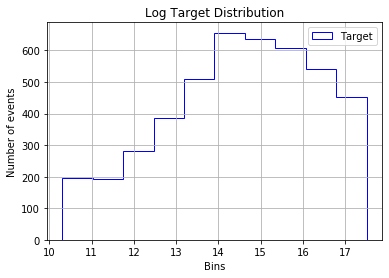

In [25]:
#target distribution
plt.title("Log Target Distribution")
#plt.hist(clean_df1["label"],  label='Target cleaned df1', histtype='step', color='r', alpha=1.0)
plt.hist(clean_df["label"],  label='Target', histtype='step', color='b', alpha=1.0)
plt.xlabel("Bins")
plt.ylabel("Number of events")
plt.legend()
plt.grid()
plt.savefig("images/targets_distribution.png")
plt.show()


In [22]:
#Removing all target

del clean_df1["target"]
del clean_df["target"]

In [32]:
clean_df.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466,label
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,17.453097
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,13.304685
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,16.118096
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,14.508658
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,16.482739


In [33]:
#From selected features
spark_df1 = sqlContext.createDataFrame(clean_df1)

In [35]:
#From original data
spark_df = sqlContext.createDataFrame(clean_df)

#### 2.6 Splitting the data into training, testing, and validation sets

We'll save the data for approximately 10 % to use as a validation set after we've trained the network. We'll use this test set to make predictions.
VectorAssembler is a transformer that combines a given list of columns into a single vector column. After splitting, we will combine all features to a single vector column.

In [23]:
df1_features=list(clean_df1.columns) 
df_features=list(clean_df.columns)

In [7]:
#From selected features

In [37]:
train_df1, test_df1 = spark_df1.randomSplit([0.9, 0.1], seed=12345)

In [38]:
vectorAssembler_df1_train = VectorAssembler(inputCols=df1_features,outputCol="features")
train_df1_VA = vectorAssembler_df1_train.transform(train_df1)

In [39]:
test_df1_VA = vectorAssembler_df1_train.transform(test_df1)

In [40]:
train_df1_VA.select("features", "label").show(truncate=False)

+------------------------------+------------------+
|features                      |label             |
+------------------------------+------------------+
|(40,[39],[10.308952660644293])|10.308952660644293|
|(40,[39],[10.308952660644293])|10.308952660644293|
|(40,[39],[10.308952660644293])|10.308952660644293|
|(40,[39],[10.308952660644293])|10.308952660644293|
|(40,[39],[10.491274217438248])|10.491274217438248|
|(40,[39],[10.596634733096073])|10.596634733096073|
|(40,[39],[10.596634733096073])|10.596634733096073|
|(40,[39],[10.596634733096073])|10.596634733096073|
|(40,[39],[10.778956289890028])|10.778956289890028|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.819778284410283])|10.819778284410283|
|(40,[39],[10.858998997563564])|10.858998997563564|
|(40,[39],[1

In [6]:
#From original data

In [41]:
train_df, test_df = spark_df.randomSplit([0.9, 0.1], seed=12345)

In [42]:
vectorAssembler_df = VectorAssembler(inputCols=df_features,outputCol="features")
train_df_VA = vectorAssembler_df.transform(train_df)

In [43]:
test_df_VA = vectorAssembler_df.transform(test_df)

In [44]:
normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
l1NormData = normalizer.transform(train_df1_VA)
print("Normalized using L^1 norm")

Normalized using L^1 norm


In [45]:
norm1=l1NormData.selectExpr("normFeatures as features", "label")

In [46]:
norm1.show()

+---------------+------------------+
|       features|             label|
+---------------+------------------+
|(40,[39],[1.0])|10.308952660644293|
|(40,[39],[1.0])|10.308952660644293|
|(40,[39],[1.0])|10.308952660644293|
|(40,[39],[1.0])|10.308952660644293|
|(40,[39],[1.0])|10.491274217438248|
|(40,[39],[1.0])|10.596634733096073|
|(40,[39],[1.0])|10.596634733096073|
|(40,[39],[1.0])|10.596634733096073|
|(40,[39],[1.0])|10.778956289890028|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.819778284410283|
|(40,[39],[1.0])|10.858998997563564|
|(40,[39],[1.0])|10.896739325546411|
|(40,[39],[1.0])|10.933106969717286|
|(40,[39],[1.0])|10.950806546816688|
|(40,[39],[1.0])|11.002099841204238|
+---------------+------------------+
only showing top 20 rows



# 3. Building the model 

### 3.1. Linear Regression

In [35]:
# Load training data for original data
lr_df = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel_df = lr_df.fit(train_df_VA)

In [36]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel_df.coefficients))
print("Intercept: %s" % str(lrModel_df.intercept))

Coefficients: (4992,[4991],[0.8342062562320659])
Intercept: 2.404150400875663


In [37]:
# Summarize the model over the training set and print out some metrics
trainingSummary_df = lrModel_df.summary
print("numIterations: %d" % trainingSummary_df.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary_df.objectiveHistory))

numIterations: 11
objectiveHistory: [0.499875, 0.4490492421973485, 0.19587299668714786, 0.16371736541493837, 0.1405416470750869, 0.14014830147005627, 0.14002552535094756, 0.1399694548235901, 0.1399628933500135, 0.13996212551461895, 0.1399620356611453]


In [38]:
print("RMSE: %f" % trainingSummary_df.rootMeanSquaredError)
print("r2: %f" % trainingSummary_df.r2)

RMSE: 0.290364
r2: 0.972512


In [39]:
residuals=trainingSummary_df.residuals

In [40]:
# Load training data 
lr_df1 = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel_df1 = lr_df1.fit(train_df1_VA)

In [41]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel_df1.coefficients))
print("Intercept: %s" % str(lrModel_df1.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8349761896083154]
Intercept: 2.3900998843740995


In [42]:
# Summarize the model over the training set and print out some metrics
trainingSummary_df1 = lrModel_df1.summary
print("numIterations: %d" % trainingSummary_df1.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary_df1.objectiveHistory))

numIterations: 6
objectiveHistory: [0.5, 0.4261895701031709, 0.13951997010882244, 0.13950947706291023, 0.1395094766788198, 0.13950947667881178]


In [43]:
residuals_df1=trainingSummary_df1.residuals
print("RMSE: %f" % trainingSummary_df1.rootMeanSquaredError)
print("r2: %f" % trainingSummary_df1.r2)

RMSE: 0.290099
r2: 0.972767


In [84]:
# Load training data 
norm_df1 = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
Norm_Model_df1 = norm_df1.fit(norm1)

In [85]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(Norm_Model_df1.coefficients))
print("Intercept: %s" % str(Norm_Model_df1.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: 14.48336381702246


In [86]:
# Summarize the model over the training set and print out some metrics
trainingSummary_df1_N = Norm_Model_df1.summary
print("numIterations: %d" % trainingSummary_df1_N.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary_df1_N.objectiveHistory))

numIterations: 1
objectiveHistory: [0.5]


In [87]:
residuals_df1_N=trainingSummary_df1_N.residuals
print("RMSE: %f" % trainingSummary_df1_N.rootMeanSquaredError)
print("r2: %f" % trainingSummary_df1_N.r2)

RMSE: 1.757919
r2: -0.000000


### 3.2. Gradient-boosted tree regression

In [100]:
# Train a GBT model on selected features.
gbt = GBTRegressor(featuresCol="features", maxIter=10)
# Train model.  This also runs the indexer.
model = gbt.fit(train_df1_VA)

In [103]:
# Make predictions.
predictions = model.transform(test_df1_VA)

In [104]:
# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|10.566659505137213|10.373491181781864|(40,[39],[10.3734...|
|10.566659505137213|10.596634733096073|(40,[39],[10.5966...|
|11.592726554364813| 11.55214617812351|(40,[39],[11.5521...|
|12.004255814977592|11.929989708921745|(40,[39],[11.9299...|
|12.004255814977592| 12.01974306733868|(40,[39],[12.0197...|
+------------------+------------------+--------------------+
only showing top 5 rows



In [108]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
# Select (prediction, true label) and compute test error
evaluatorr2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")
r2 = evaluatorr2.evaluate(predictions)
print("R-squared coefficient on test data = %g" % r2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


R-squared coefficient on test data = 0.998286
Root Mean Squared Error (RMSE) on test data = 0.0697984


In [109]:
# Train a GBT model on original data.
gbt_O = GBTRegressor(featuresCol="features", maxIter=10)
# Train model.  This also runs the indexer.
model = gbt_O.fit(train_df_VA)

In [112]:
# Make predictions.
predictions_O = model.transform(test_df_VA)

In [113]:
# Select example rows to display.
predictions_O.select("prediction", "label", "features").show(5)

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
| 12.92703569877041| 12.89921982609012|(4992,[3373,4125,...|
|15.614942661775947| 15.60727002719233|(4992,[2339,2565,...|
| 13.96547815334335|  13.9108207377686|(4992,[916,2133,2...|
| 16.81494486380302|16.811242831518264|(4992,[694,743,48...|
|15.422626727183378|15.424948470398375|(4992,[678,974,20...|
+------------------+------------------+--------------------+
only showing top 5 rows



In [114]:
# Select (prediction, true label) and compute test error
Oevaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
Ormse = Oevaluator.evaluate(predictions)
# Select (prediction, true label) and compute test error
Oevaluatorr2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2")
Or2 = Oevaluatorr2.evaluate(predictions)
print("R-squared coefficient on test data = %g" % Or2)
print("Root Mean Squared Error (RMSE) on test data = %g" % Ormse)

R-squared coefficient on test data = 0.998286
Root Mean Squared Error (RMSE) on test data = 0.0697984


### Note

From the models above, we noticed that the GBT is performing better thant Linear Regression model. So when predictins the value, we decided to use the GBT Regressor.

### 3.3. Deep Learning model with Keras

In [24]:
X_df1 = clean_df1.drop(["label"], axis=1)
y_df1=clean_df1["label"]

In [25]:
X_df = clean_df.drop(["label"], axis=1)
y_df=clean_df["label"]

### 3.1 Splitting the data

In [26]:
#We split the data set by taking 80% of data for training and 10% for testing. Note we use a rondom sampling
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.1, random_state=1)

In [27]:
#We split the data set by taking 80% of data for training and 10% for testing. Note we use a rondom sampling
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.1, random_state=1)

In [28]:
input_shape_df1=X_train_df1.shape
input_shape_df=X_train_df.shape

### 3.2 Building model

In [33]:
### Building simple model for df1

In [31]:
def kears_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=input_shape_df1[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [32]:
# evaluate model
estimator = KerasRegressor(build_fn=kears_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train_df1, y_train_df1, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -3.08 (0.10) MSE


In [ ]:
 ### Building simple model for df

In [35]:
def kears_model_df():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=input_shape_df[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [36]:
# evaluate model
estimator = KerasRegressor(build_fn=kears_model_df, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
resultsDF = cross_val_score(estimator, X_train_df, y_train_df, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (resultsDF.mean(), results.std()))

Baseline: -12489654999.71 (0.10) MSE


# Summary

In this project we have learning:

<ul>
    <li>How to load, prepare and clean the data</li>
    <li> How to feature selection </li>
    <li> How to train model and deploy it</li>
</li>

After checking 3 algorithm for our value prediction problem, we have concluded that the Gradient Boost Tree Regressor perform well over Linear Regression, Keras regressor algorithms. 

The metrics used for this purpose were Root Mean Square Error and R-Squared. 